In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import beta

posterior mean:  0.16083916083916083
confidence interval 25%: 0.120656014802665
confidence interval 95%: 0.13300594840008015
0.17845955613638365


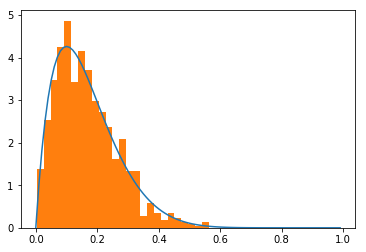

In [8]:
data = pd.read_csv('algae.txt', sep="\n", header=None)
n = data[0].count()

alfa_prior = 2
beta_prior = 10

alfa_y = 44
beta_y = 230

alfa_post = alfa_y + alfa_prior
beta_post = beta_y + beta_prior

y = alfa_y / (alfa_y + beta_y)
prior = alfa_prior / (alfa_prior + beta_prior)
posterior = alfa_post / (alfa_post + beta_post)

print('posterior mean: ', posterior)
print('confidence interval 25%:', beta.ppf(0.025, alfa_post, beta_post))
print('confidence interval 95%:', beta.ppf(0.095, alfa_post, beta_post))

l, u = beta.ppf(0.025, alfa_post, beta_post), beta.ppf(1 - 0.025, alfa_post, beta_post)
print(beta.cdf(u, a=1, b=3) - beta.cdf(l, a=1, b=3))

x = np.arange(0, 1, 0.01)
density = beta.pdf(x, alfa_prior, beta_prior)

sample = beta.rvs(alfa_prior, beta_prior, size = 1000)

plt.plot(x, density)
plt.hist(sample, density=True, bins = 25)


plt.show()

0.13300594840008015


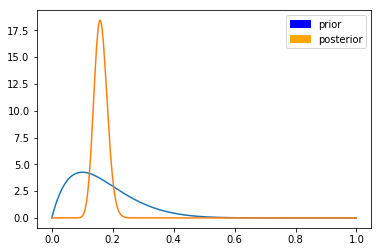

In [4]:
x = np.arange(0, 1, 0.001)

density = beta.pdf(x, alfa_prior, beta_prior)
density_post = beta.pdf(x, alfa_post, beta_post)

sample = beta.rvs(alfa_post, beta_post, size = 1000)
print(beta.ppf(0.095, alfa_post, beta_post))

blue_patch = mpatches.Patch(color='blue', label='prior')
orange_patch = mpatches.Patch(color='orange', label='posterior')
plt.legend(handles=[blue_patch, orange_patch])

plt.plot(x, density)
plt.plot(x, density_post)

# We can see that the expected value is similar

In [5]:
cumulative = beta.cdf(0.2, alfa_post, beta_post)
print(cumulative)

0.9586135871948555


prior:  0.09090909090909091
posterior:  0.11764705882352941
confidence interval 25%: 0.09506821115263539
confidence interval 95%: 0.10212344734770791


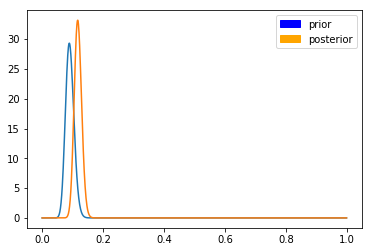

In [6]:
alfa_prior = 40
beta_prior = 400

alfa_post = alfa_y + alfa_prior
beta_post = beta_y + beta_prior

y = alfa_post / (alfa_post + beta_post)
prior = alfa_prior / (alfa_prior + beta_prior)
posterior = alfa_post / (alfa_post + beta_post)
print('prior: ', prior)
print('posterior: ', posterior)
print('confidence interval 25%:', beta.ppf(0.025, alfa_post, beta_post))
print('confidence interval 95%:', beta.ppf(0.095, alfa_post, beta_post))

x = np.arange(0, 1, 0.001)

density = beta.pdf(x, alfa_prior, beta_prior)
density_post = beta.pdf(x, alfa_post, beta_post)

blue_patch = mpatches.Patch(color='blue', label='prior')
orange_patch = mpatches.Patch(color='orange', label='posterior')
plt.legend(handles=[blue_patch, orange_patch])
plt.plot(x, density)
plt.plot(x, density_post)